In [88]:
%matplotlib inline
import xarray as xr
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import MinMaxScaler
from pandas.tools.plotting import scatter_matrix

In [11]:
data = xr.open_dataset("./mean_POC_budget_LR.nc")

In [24]:
data

<xarray.Dataset>
Dimensions:         (nlat: 384, nlon: 320, time: 1)
Coordinates:
  * nlat            (nlat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * nlon            (nlon) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * time            (time) int64 0
Data variables:
    TLAT            (nlat, nlon) float32 -79.2205 -79.2205 -79.2205 -79.2205 ...
    TLONG           (nlat, nlon) float32 320.562 321.688 322.812 323.938 ...
    sp_agg          (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    diat_agg        (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    diat_loss_poc   (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    graze_diat_poc  (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    graze_sp_poc    (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    sp_loss_poc     (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    zoo_loss_poc    (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    POC_PROD_sum    (t

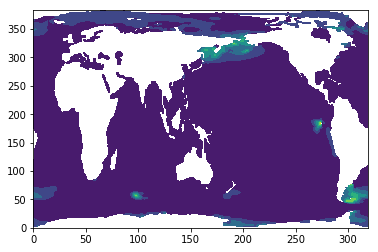

In [3]:
plt.contourf(np.ma.array(data["diatC"][0], mask=data["diatC"][0] > 1e30))

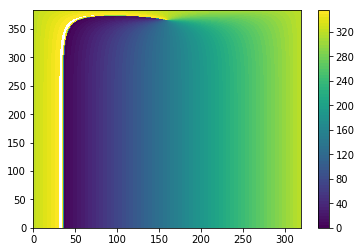

In [8]:
plt.contourf(data["TLONG"], np.arange(0, 360, 5))
plt.colorbar()

/Users/dgagne/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


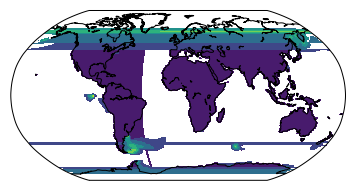

In [36]:
m = Basemap(projection='robin', lon_0=0)
x, y = m(data["TLONG"].values[:-50], data["TLAT"].values[:-50])
m.drawcoastlines()
plt.contourf(x,y, np.ma.array(data["diatC"][0], mask=data["diatC"][0] > 1e30)[:-50])

diatC 3.05416e-13 490.593
zooC 4.03028e-12 156.424
spC 1.60229e-14 276.97
diazC -0.002354 13.4897


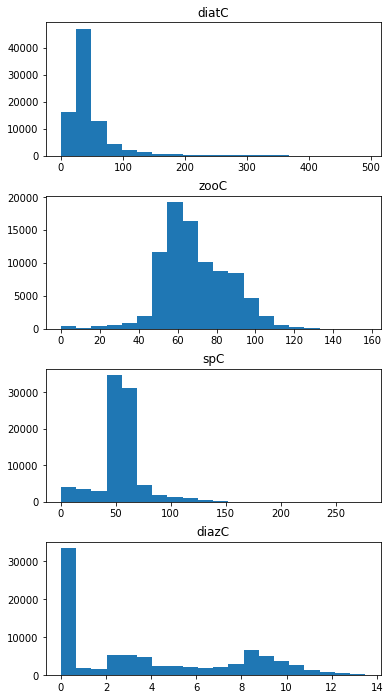

In [67]:
plankton_vars = ["diatC", "zooC", "spC", "diazC"]
plankton_data = {}
fig, axes = plt.subplots(len(plankton_vars), 1, figsize=(6, 12))
axes_flat = axes.ravel()
plt.subplots_adjust(hspace=0.3)

for v, var in enumerate(plankton_vars):
    plankton_data[var] = data[var][0].values
    plankton_data[var][plankton_data[var] > 1e30] = np.nan
    print(var, plankton_data[var][~np.isnan(plankton_data[var])].min(), plankton_data[var][~np.isnan(plankton_data[var])].max())
    axes_flat[v].hist(plankton_data[var][~np.isnan(plankton_data[var])], 20)
    axes_flat[v].set_title(var)

sp_agg 0.0 16.1637
diat_agg 0.0 39.0613
diat_loss_poc 0.0 0.464442
graze_diat_poc 0.0 19.4574
graze_sp_poc 0.0 8.07995
sp_loss_poc 0.0 1.07477
zoo_loss_poc 0.0 4.19881


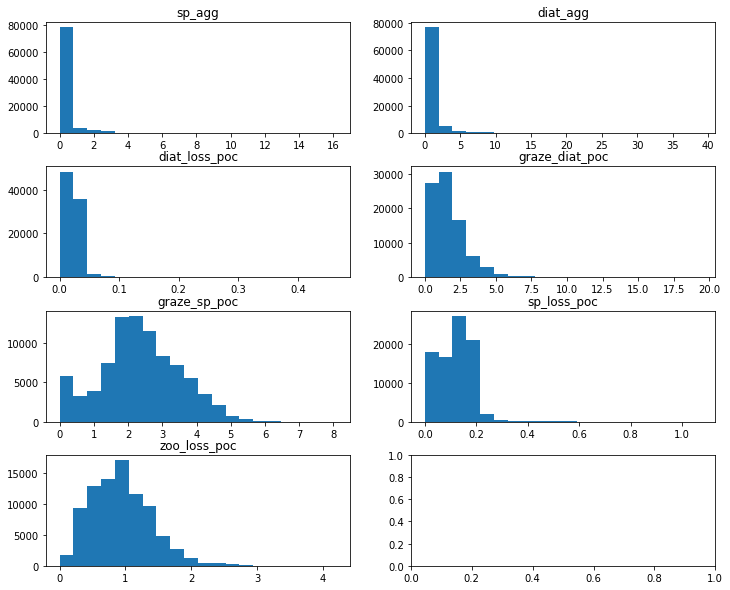

In [66]:
budget_vars = ["sp_agg", "diat_agg", "diat_loss_poc", "graze_diat_poc", "graze_sp_poc", "sp_loss_poc", "zoo_loss_poc"]
budget_data = {}
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3)
axes_flat = axes.ravel()
for v, var in enumerate(budget_vars):
    budget_data[var] = data[var][0].values
    budget_data[var][budget_data[var] > 1e30] = np.nan
    print(var, budget_data[var][~np.isnan(budget_data[var])].min(), budget_data[var][~np.isnan(budget_data[var])].max())
    axes_flat[v].hist(budget_data[var][~np.isnan(budget_data[var])], 20)
    axes_flat[v].set_title(var)

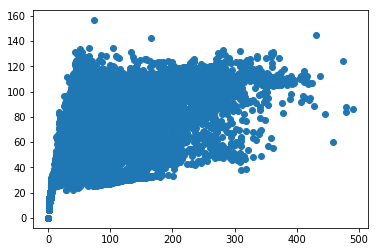

In [87]:
plt.scatter(plankton_data["diatC"][~np.isnan(plankton_data["diatC"])],
          plankton_data["zooC"][~np.isnan(plankton_data["spC"])])

In [72]:
plankton_flat_data = {}
for k,v in plankton_data.items():
    plankton_flat_data[k] = v.ravel()
plankton_frame = pd.DataFrame(plankton_flat_data)

In [91]:
budget_flat_data = {}
for k,v in budget_data.items():
    budget_flat_data[k] = v.ravel()
budget_frame = pd.DataFrame(budget_flat_data)

In [83]:
mms = MinMaxScaler()
scaled_plankton_frame = mms.fit_transform(plankton_frame.dropna())
dbs = DBSCAN(eps=0.5)
dbs.fit(scaled_plankton_frame)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

In [85]:
dbs.components_

(86212, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129acf0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12422cd30>]], dtype=object)

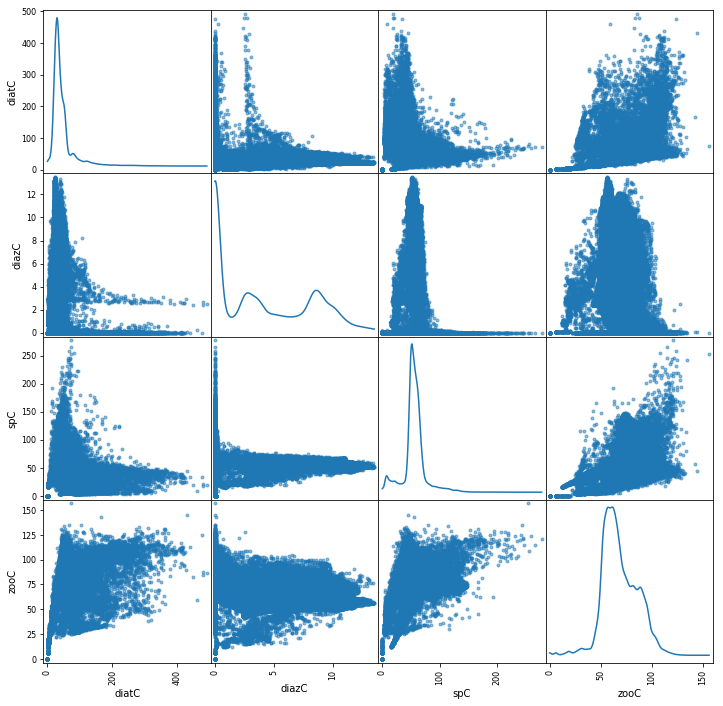

In [90]:
scatter_matrix(plankton_frame, figsize=(12, 12), diagonal="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c0b7d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13d5d3780>]], dtype=object)

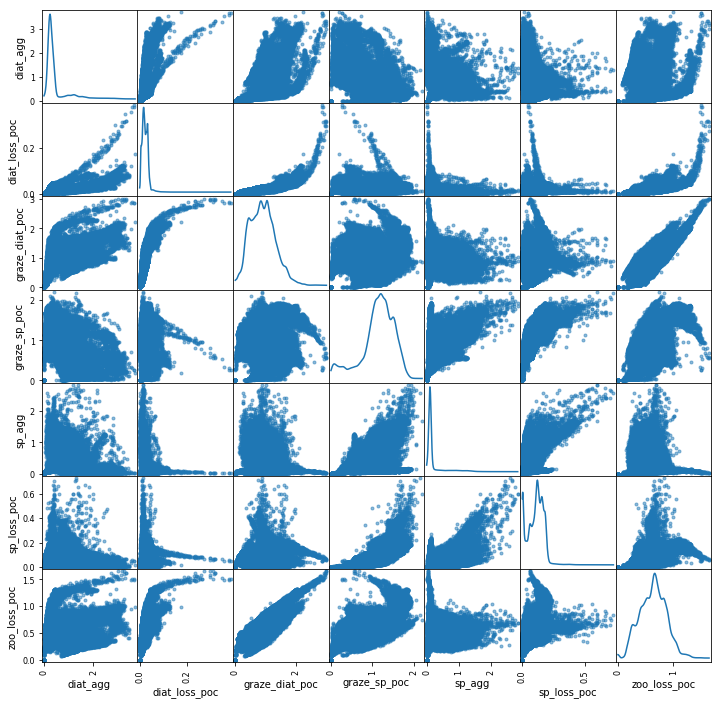

In [96]:
scatter_matrix((budget_frame.dropna() + 1).apply(np.log), figsize=(12, 12), diagonal="kde")